### Лабораторная работа №5
#### Идентификация параметров линейного регрессионного объекта при α− загрязненных шумах

Пусть линейный регрессионный объект имеет вид:
$$ \large y(i)=с_{0}+с_{1}u_{1}(i)+...+с_{4}u_{4}(i)+\eta(i) , $$ 

где шум, действующий на объект, принадлежит классу приближенно нормальных распределений:
$ \large f(\eta) = (1-\alpha)f_N(\eta) + \alpha g(\eta) $ <br>
$ \large f_N(\eta) = \frac{1}{\sqrt{2 \pi} \sigma_\eta} exp(- \frac{\eta^2}{2 \sigma^2_\eta}) $ - нормальное распределение $ \large N(0, \sigma_\eta)$, <br>
$\large \alpha$ - вероятность появление выброса с рапределением $\large g(\eta)$ <br>
$\large g(\eta)$ - вообще говоря какое-то распределение, но в данной лабораторной работе будет нормальным $ \large N(0, \sigma_\eta (outlier))$, но его параметры отличны от $\large f_N(\eta)$

In [1]:
import numpy as np
import pandas as pd
import math
from scipy.stats import rv_continuous
import scipy
from sympy import *
import functools

In [2]:
# параметры объекта 
# с0=...
# с1=...
# с2=...
# с3=...
# с4=...
c = np.array([9,2,3,1,4])

In [3]:
# количество измерений
N=200 

#### Сгенерируем шум, принадлежащий классу приближенно нормальных распределений

In [4]:
# класс для "загрязненного" распределения
class gaussian_gen(rv_continuous):
    
    def _pdf(self, x, alpha, sigma_1, sigma_2):
        "Gaussian distribution"
        def gaussian(self, x, sigma):
            return np.exp(-x**2 / 2. / sigma**2) / (np.sqrt(2.0 * np.pi)*sigma)
        
        return (1-alpha)*gaussian(self, x, sigma_1)+alpha*gaussian(self, x, sigma_2)

gaussian = gaussian_gen(name='dirty_distrib')

Зададим следующие параметры нашего загрязненного распределения для шума:

In [18]:
alpha = 0.3
sigma_1 = 0.5
sigma_2 = 50
Noise = gaussian.rvs(alpha, sigma_1, sigma_2, size=N)

OverflowError: (34, 'Numerical result out of range')

#### Посмотрим на сгенерированный шум и увидим "выбросы" из другого распределения

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

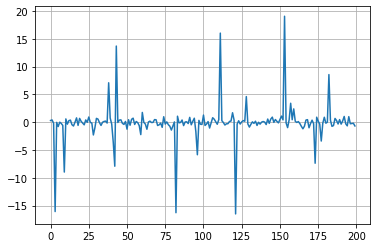

In [7]:
plt.plot(Noise)
plt.grid()

#### Зададим параметры входов объекта и смоделируем выход объекта

In [8]:
#Ваш код здесь
# Avg_U1=...
# Var_U1=...
# Avg_U2=...
# Var_U2=...
# Avg_U3=...
# Var_U3=...
# Avg_U4=...
# Var_U4=...

In [9]:
#Ваш код здесь
# U1=np.random.normal(Avg_U1, Var_U1, N)
# U2=np.random.normal(Avg_U2, Var_U2, N)
# U3=np.random.normal(Avg_U3, Var_U3, N)
# U4=np.random.normal(Avg_U4, Var_U4, N)

In [10]:
# моделирование выхода объекта
# y=с0+с1*U1+с2*U2+с3*U3+с4*U4+Noise
AvgVar = pd.DataFrame({"avg":np.array([1, 1, 1, 1, 1]), "var":np.array([0, 50, 50, 50, 50])})
U = np.array([np.random.normal(i.avg, i.var, size=N) for i in AvgVar.itertuples()])
y = np.dot(c, U) + Noise

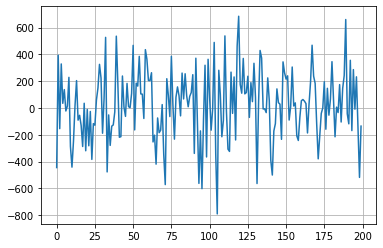

In [11]:
plt.plot(y)
plt.grid()

### Эффективность алгоритма Хубера vs Рекуррентным МНК при различных статистических характеристиках распределений

В лабораторной работе требуется:

1. Реализовать __class Huber__ c методами: <br>
   * в конструкторе класса небходимо задать:<br>
     1) λ в формуле задания начального приближения матрицы Г(0) = λ*I <br>
    2) параметр $ \xi $, участвующий в функции потерь Хьюбера, в зависимости от вероятности появления выброса $ \alpha $ (значения которого приведены в описании ЛР) <br><br>
   *   __def fit(X, y, c0)__ - метод реализует алгоритм итерационного оценивания параметов объекта с использованием функции потерь Хьюбера:<br>
        <br>
        Input:<br>
            X - матрица входов объекта, [X] = m x N <br>
            y - вектор выходов объекта, [y] = N <br>
            с0 - вектор начального приближения, [c0] = m <br>
        <br>       
   * __def get_coefs()__ - метод возвращает массив коэффициентов оценок вектора параметров объекта, получаемого на каждом новом шаге измерений<br>
        <br>
        Output:<br>
            c_estim_huber - массив оценок параметров объекта, полученный в результате работы метода fit<br><br>
2. Реализовать __class RecurrentMLS__ с методами: <br>

    * в конструкторе класса небходимо задать:<br>
     1) λ в формуле задания начального приближения матрицы Г(0) = λ*I <br><br>

    * __def fit(X, y, c0)__ - метод реализует алгоритм итерационного оценивания параметов объекта с использованием квадратичной функции потерь (см. 2 лабораторную работу):<br>
         <br>
     Input:<br>
             X - матрица входов объекта, [X] = m x N<br>
             y - вектор выходов объекта, [y] = N<br>
             с0 - вектор начального приближения, [c0] = m+1<br><br>
        
    * __def get_coefs()__ - метод возвращает массив коэффициентов оценок вектора параметров объекта, получаемого на каждом новом шаге измерений<br>
        <br>
        Output:<br>
            c_estim_recMLS - массив оценок параметров объекта, полученный в результате работы метода fit<br><br>        
3. Реализовать функцию __smooth_errors(c_estim, c_true)__  - вычисляет сглаженную ошибку оценки по 10 измерениям. <br>
         Input: 
             c_estim - массив оценок параметров объекта, [c_estim] = m+1 x N
             c_true - вектор истинных параметров объекта, [c_true] = m+1 
         Output:
             err - массив сглаженных ошибок оценки
              
4. Провести исследование эффективности алгоритма Хубера по сравнению с рекуррентным МНК алгоритмом при следующих статистических характеристиках распределений:<br>
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.1    $\sigma_\eta (outlier)$ = 10;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.1    $\sigma_\eta (outlier)$ = 50;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.1    $\sigma_\eta (outlier)$ = 100;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.3    $\sigma_\eta (outlier)$ = 10;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.3    $\sigma_\eta (outlier)$ = 50;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.3    $\sigma_\eta (outlier)$ = 100. <br><br>
5. Построить графики сходимости сглаженной ошибки оценки по двум алгоритмам: алгоритм с использованием теоремы Хубера и рекуррентный алгоритм, соответствующий методу наименьших квадратов. Сдалать выводы.

In [12]:
statistics = pd.DataFrame({"sigma":[0.5, 0.5, 0.5, 0.5, 0.5, 0.5,], 
                           "alpha":[0.1, 0.1, 0.1, 0.3, 0.3, 0.3,],
                        "sigma_nu":[ 10,  50, 100,  10,  50, 100,]})

AvgVar = pd.DataFrame({"avg":np.array([1, 1, 1, 1, 1]), "var":np.array([0, 50, 50, 50, 50])})

In [121]:
statistics = pd.DataFrame({"sigma":[0.5, 0.5, 0.5, 0.5,], 
                           "alpha":[0.1, 0.1, 0.3, 0.3,],
                        "sigma_nu":[ 10,  30,  10,  30,]})
AvgVar = pd.DataFrame({"avg":np.array([1, 1, 1, 1, 1]), "var":np.array([0, 50, 50, 50, 50])})
dict_ksi = {0.1:1.1, 0.3:0.9}

In [71]:
class Huber:
    def __init__(self, lambada, ksi, statistic):
        self.lambada = lambada
        self.ksi = ksi
        self.stat = statistic
        self.delta = self.ksi * self.stat["sigma"]
        
    def fN(self):
        return exp(-self.delta/self.stat["sigma"]**2/(2*self.stat["sigma"]**2))/(self.stat["sigma"]*math.sqrt(2*pi))
    
    @functools.lru_cache()
    def I_F(self):
        var = Symbol('x')
        integral = integrate(var**2*exp(-var**2/(2*self.stat["sigma"]**2)),(var,-self.delta,self.delta))
        first = 2*(1-self.stat["alpha"])*(self.delta/self.stat["sigma"]**2)*self.fN()
        second = (1-self.stat["alpha"])*(1/(math.sqrt(2*math.pi)*self.stat["sigma"]**5))
        If = first+second*integral.n()
        return If
        
    def delta_eps(self, c_i):
        return math.copysign(self.delta, c_i) if math.fabs(c_i) > math.fabs(self.delta) else c_i
    
    def gen(self, X, y, c0):
        G = self.lambada*np.eye(len(c0))
        tmp_c = c0.copy()
        for idx, ulist in enumerate(np.nditer([i for i in U])):
            z = np.asmatrix(ulist).transpose()
            d_eps = self.delta_eps(y[idx] - np.dot(tmp_c, ulist))
            G = G - (G*z*z.getT()*G)/(1/self.I_F()+z.getT()*G*z)
            tmp_c = np.asarray((tmp_c + d_eps * np.asarray((np.dot(G, z)).ravel())).ravel())
            yield tmp_c
            
    def fit(self, X, y, c0):
        self.tmp = np.zeros((len(y), len(c0)))
        for idx, new_y in enumerate(self.gen(X, y, c0)):
            self.tmp[idx] = new_y
        
    def get_coefs(self):
        return self.tmp


In [72]:
class RecurrentMLS():
    def __init__(self, lambada):
        self.lambada = lambada
        
    def gen(self, X, y, c0):
        G = self.lambada*np.eye(len(c0))
        tmp_c = c0.copy()
        for idx, ulist in enumerate(np.nditer([i for i in U])):
            z = np.asmatrix(ulist).transpose()
            d_eps = y[idx] - np.dot(tmp_c, ulist)
            G = G - (G*z*z.getT()*G)/(1+z.getT()*G*z)
            tmp_c = np.asarray((tmp_c + d_eps * np.asarray((np.dot(G, z)).ravel())).ravel())
            yield tmp_c
       
    def fit(self, X, y, c0):
        self.tmp = np.zeros((len(y), len(c0)))
        for idx, new_y in enumerate(self.gen(X, y, c0)):
            self.tmp[idx] = new_y
        
    def get_coefs(self):
        return self.tmp

In [113]:
def smooth_errors_gen(tmp_c, c, split):
    tmp_tmp = []
    for i, curr in enumerate(tmp_c):
        tmp_tmp.append(curr)
        if i <= split:
            continue
        cur_sum=0
        for j in range(split):
            for exp, real in zip(tmp_tmp[i-j][1:], c[1:]):
                cur_sum += (exp-real)**2
        yield (cur_sum/split)**0.5
        
def smooth_errors(tmp_c, c):
    split = 10
    tmp = np.zeros(len(tmp_c)//split)
    for idx, new_err in enumerate(smooth_errors_gen(tmp_c, c, split)):
        tmp[idx] = new_err
    return tmp

alpha: 0.1 sigma: 0.5 sigma(outlier): 10.0


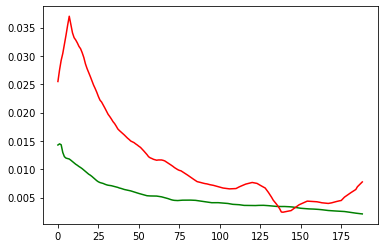

alpha: 0.1 sigma: 0.5 sigma(outlier): 30.0


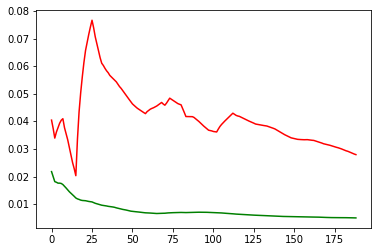

alpha: 0.3 sigma: 0.5 sigma(outlier): 10.0


In [ ]:
# print(c)
lyambda = 0.1
r_c = np.array([i+np.random.random_sample() * lyambda-np.random.random_sample() * lyambda for i in c])
# print(r_c)
for ind, stat in statistics.iterrows():
    print("alpha:", stat["alpha"], "sigma:", stat["sigma"], "sigma(outlier):", stat["sigma_nu"])
    gaussian = gaussian_gen(name='dirty_distrib')
    Noise = gaussian.rvs(stat["alpha"], stat["sigma"], stat["sigma_nu"], size=N)
    U = np.array([np.random.normal(i.avg, i.var, size=N) for i in AvgVar.itertuples()])
    y = np.dot(c, U) + Noise
    hub = Huber(lyambda, dict_ksi[stat["alpha"]], stat)
    rec = RecurrentMLS(lyambda)
#     hub.fit(U, y, c)
#     rec.fit(U, y, c)
#     print(hub.get_coefs()[-1], rec.get_coefs()[-1])
    
    err1 = tuple(i for i in smooth_errors_gen(hub.gen(U, y, c), c, 10))
#     print(err1)
    err2 = tuple(i for i in smooth_errors_gen(rec.gen(U, y, c), c, 10))
#     print(err2)
    
    plt.plot(err1, label='Huber', color='green')
    plt.plot(err2, label='MLS', color='red')
    plt.show()

### Hints

1. Рекуррентный алгоритм при функции потерь Хьюбера имеет вид:
\begin{equation} \large \hat{\vec{c}}(i)=\hat{\vec{c}}(i-1)+Г(i)d(\varepsilon(i, \hat{\vec{c}}(i-1)))\vec{z}(i) \\
\large Г(i)=Г(i-1)-\frac{Г(i-1)\vec{z}(i)\vec{z}(i)^TГ(i-1)}{I^{-1}_F+\vec{z}^T(i)Г(i-1)\vec{z}(i)} \\
\large Г(0)=\lambda I, \lambda >> 1,  \hat{\vec{c}}(0)=\vec{c}_{0}\end{equation}

где $ \large  \Delta = \xi\sigma_\eta$
\begin{equation} \large d(\varepsilon(i, \hat{\vec{c}}(i-1)))=\frac{dF(\varepsilon(i, \hat{\vec{c}}(i-1)))}{d\varepsilon}|_{\varepsilon = \varepsilon(i, \hat{\vec{c}}(i-1)))}= \left\{
    \begin{array}\\
        -\Delta, & \varepsilon(i) \leq -\Delta \\
        \varepsilon(i, \hat{\vec{c}}(i-1))), & -\Delta \leq |\varepsilon(i)| \leq \Delta\\
        \Delta, &  \varepsilon(i) \geq \Delta
    \end{array}  
\right.\end{equation}

\begin{equation} \large  I_F=2(1-\alpha)\frac{\Delta}{\sigma^2_\eta}f_N(\frac{\Delta}{\sigma_\eta})+(1-\alpha)\frac{1}{\sqrt{2\pi}\sigma_\eta}\frac{1}{\sigma^4_\eta}\int_{-\Delta}^\Delta \eta^2exp(\frac{-\eta^2}{2\sigma^2_\eta})d\eta\end{equation}

2. Для вычислении информации Фишера можно использовать модуль __sympy__ (https://docs.sympy.org/latest/modules/integrals/integrals.html)